In [77]:
# pip install datapackage

In [78]:
# pip install pygwalker

In [79]:
## Web source method

# import dependencies
# import datapackage
# import pandas as pd
# import pygwalker as pyg


# data_url = 'https://datahub.io/core/sea-level-rise/datapackage.json'

# # to load Data Package into storage
# package = datapackage.Package(data_url)

# # to load only tabular data
# resources = package.resources
# for resource in resources:
#     if resource.tabular:
#         data = pd.read_csv(resource.descriptor['path'])
#         print (data)

In [80]:
## CSV method

#import dependencies & setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pygwalker as pyg
from pathlib import Path
from scipy import stats



# file to load 
historical_sea_level_to_load = Path("../../Resources/sea-level-rise-historical.csv")
predictions_sea_level_to_load = Path("../../Resources/sea-level-rise-predictions.csv")

# read CSV
sealevelrise_data_historical = pd.read_csv(historical_sea_level_to_load)
sealevelrise_data_predictions = pd.read_csv(predictions_sea_level_to_load)

# convert to pandas df
slr_data_historical = pd.DataFrame(sealevelrise_data_historical)
slr_data_predictions = pd.DataFrame(sealevelrise_data_predictions)



### CSIRO (Commonwealth Scientific and Industrial Research Organization) Data 
 This data contains “cumulative changes in sea level for the world’s oceans since 1880, based on a combination of long-term tide gauge measurements and recent satellite measurements. It shows average absolute sea level change, which refers to the height of the ocean surface, regardless of whether nearby land is rising or falling. The data is recorded in centimeters.

In [81]:
# historical global avg sea level rise in cm
slr_data_historical.head()

,Year,CSIRO - Adjusted sea level (cm),CSIRO - Lower error bound (cm),CSIRO - Upper error bound (cm),NOAA - Adjusted sea level (cm)
0,1880,0.00,-2.42,2.42,NaN
1,1881,0.56,-1.86,2.98,NaN
2,1882,-1.12,-3.42,1.18,NaN
3,1883,-0.59,-2.87,1.69,NaN
4,1884,1.50,-0.72,3.72,NaN


In [98]:
# predicted global avg sea level rise in cm
slr_data_predictions.head()

,Site,PSMSL ID,Latitude,Longitude,Scenario,Background RSL rate (mm/yr),RSL in 2000 (cm),RSL in 2010 (cm),RSL in 2020 (cm),RSL in 2030 (cm),RSL in 2040 (cm),RSL in 2050 (cm),RSL in 2060 (cm),RSL in 2070 (cm),RSL in 2080 (cm),RSL in 2090 (cm),RSL in 2100 (cm),RSL in 2120 (cm),RSL in 2150 (cm),RSL in 2200 (cm)
0,GMSL,0,NaN,NaN,0.3 - MED,0.0,0,3,6,9,13,16,19,22,25,28,30,34.0,37.0,39.0
1,GMSL,0,NaN,NaN,0.3 - LOW,0.0,0,3,5,9,12,15,18,21,24,26,29,30.0,32.0,29.0
2,GMSL,0,NaN,NaN,0.3 - HIGH,0.0,0,3,6,10,13,17,20,23,26,28,31,42.0,51.0,67.0
3,GMSL,0,NaN,NaN,0.5 - MED,0.0,0,4,8,13,18,24,29,35,40,45,50,60.0,73.0,95.0
4,GMSL,0,NaN,NaN,0.5 - LOW,0.0,0,3,7,12,16,22,27,33,38,44,49,56.0,66.0,77.0


## Sea Level Rise Tables

### Historical Global Sea Level Rise 

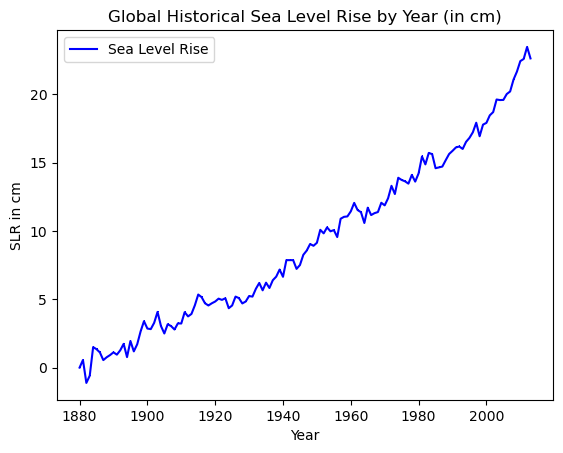

In [83]:
plt.plot(slr_data_historical['Year'], slr_data_historical['CSIRO - Adjusted sea level (cm)'], marker=',', linestyle='-', color='b', label='Sea Level Rise', animated=True)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('SLR in cm')
plt.title('Global Historical Sea Level Rise by Year (in cm)')

# Add legend
plt.legend()

# Display the graph
plt.show()


### Predictions Global Sea Level Rise 
- Ten cities: New York, Seattle, Halifax, Wilmington, North Sydney, Lautoka, Tuxpan, Miami Beach, Kapingamarangi, Yakutat

In [84]:
### Predictions Global SLR - 10 cities

# Get a list of all of our columns for easy reference
slr_data_predictions.columns

Index(['Site', 'PSMSL ID', 'Latitude', 'Longitude', 'Scenario',
       'Background RSL rate (mm/yr)', 'RSL in 2000 (cm)', 'RSL in 2010 (cm)',
       'RSL in 2020 (cm)', 'RSL in 2030 (cm)', 'RSL in 2040 (cm)',
       'RSL in 2050 (cm)', 'RSL in 2060 (cm)', 'RSL in 2070 (cm)',
       'RSL in 2080 (cm)', 'RSL in 2090 (cm)', 'RSL in 2100 (cm)',
       'RSL in 2120 (cm)', 'RSL in 2150 (cm)', 'RSL in 2200 (cm)'],
      dtype='object')

In [85]:
# Define the specific Latitude and Longitude values
target_latitudes = [40.7, 47.6, 44.67, 34.23, 46.22, -17.6, 21, 25.77, 1.1, 59.55]
target_longitudes = [-74.01, -122.34, -63.58, -77.95, -60.25, 177.44, -97.33, -80.13, 154.78, -139.73]

# Create a condition to filter rows based on specified Latitudes and Longitudes
condition = (slr_data_predictions['Latitude'].isin(target_latitudes)) & \
            (slr_data_predictions['Longitude'].isin(target_longitudes))

# Select the desired columns and rows based on the condition
selected_columns = ['Site', 'Scenario', 'Latitude', 'Longitude', 
                    'Background RSL rate (mm/yr)', 'RSL in 2000 (cm)', 
                    'RSL in 2010 (cm)', 'RSL in 2020 (cm)', 'RSL in 2030 (cm)', 
                    'RSL in 2040 (cm)', 'RSL in 2050 (cm)', 'RSL in 2060 (cm)', 
                    'RSL in 2070 (cm)', 'RSL in 2080 (cm)', 'RSL in 2090 (cm)', 
                    'RSL in 2100 (cm)', 'RSL in 2120 (cm)', 'RSL in 2150 (cm)', 
                    'RSL in 2200 (cm)']

select_cities_preddf = slr_data_predictions.loc[condition, selected_columns]
select_cities_preddf.head()

# select_cities_preddf.to_csv('../../Resources/tencities_slr_prediction.csv')


,Site,Scenario,Latitude,Longitude,Background RSL rate (mm/yr),RSL in 2000 (cm),RSL in 2010 (cm),RSL in 2020 (cm),RSL in 2030 (cm),RSL in 2040 (cm),RSL in 2050 (cm),RSL in 2060 (cm),RSL in 2070 (cm),RSL in 2080 (cm),RSL in 2090 (cm),RSL in 2100 (cm),RSL in 2120 (cm),RSL in 2150 (cm),RSL in 2200 (cm)
36,NEW YORK,0.3 - MED,40.7,-74.01,1.29,0,5,11,15,20,25,31,36,39,44,46,51.0,58.0,69.0
37,NEW YORK,0.3 - LOW,40.7,-74.01,1.20,0,2,6,10,13,15,18,19,21,21,22,27.0,28.0,26.0
38,NEW YORK,0.3 - HIGH,40.7,-74.01,1.38,0,7,14,21,28,36,42,49,54,60,65,75.0,88.0,110.0
39,NEW YORK,0.5 - MED,40.7,-74.01,1.29,0,6,13,19,25,31,39,45,50,56,61,70.0,85.0,110.0
40,NEW YORK,0.5 - LOW,40.7,-74.01,1.20,0,4,8,13,18,24,29,33,39,43,47,54.0,63.0,70.0


In [86]:
# pyg.walk(select_cities_preddf)

## Correlation between Ocean temps and Sea level Rise over the last 100 years

In [87]:
# Rows for which you want to calculate the average

# 1. NEW YORK
newyork_rows = select_cities_preddf.iloc[0:18]
# newyork_rows
newyork_meandata = newyork_rows.mean()
# newyork_meandata

# 2. HALIFAX
halifax_rows = select_cities_preddf.iloc[18:36]
# halifax_rows
halifax_meandata = halifax_rows.mean()
# halifax_meandata

# 3. SEATTLE
seattle_rows = select_cities_preddf.iloc[36:54]
# seattle_rows
seattle_meandata = seattle_rows.mean()
# seattle_meandata

# 4. MIAMI BEACH
miamibeach_rows = select_cities_preddf.iloc[54:72]
# miamibeach_rows
miamibeach_meandata = miamibeach_rows.mean()
# miamibeach_meandata

# 5. WILMINGTON
wilmington_rows = select_cities_preddf.iloc[72:90]
# wilmington_rows
wilmington_meandata = wilmington_rows.mean()
# wilmington_meandata

# 6. YAKUTAT
yakutat_rows = select_cities_preddf.iloc[90:108]
# yakutat_rows
yakutat_meandata = yakutat_rows.mean()
# yakutat_meandata

# 7. TUXPAN
tuxpan_rows = select_cities_preddf.iloc[108:126]
# tuxpan_rows
tuxpan_meandata = tuxpan_rows.mean()
# tuxpan_meandata

# 8. NORTH SYDNEY
northsydney_rows = select_cities_preddf.iloc[126:144]
# northsydney_rows
northsydney_meandata = northsydney_rows.mean()
# northsydney_meandata

# 9. KAPINGAMARANGI
kapingamarangi_rows = select_cities_preddf.iloc[144:162]
# kapingamarangi_rows
kapingamarangi_meandata = kapingamarangi_rows.mean()
# kapingamarangi_meandata

# 10. LAUTOKA
lautoka_rows = select_cities_preddf.iloc[162:180]
# lautoka_rows
lautoka_meandata = lautoka_rows.mean()
# lautoka_meandata
# type(lautoka_meandata)


# create a df using all the averages for the cities
tencities_slr_dict = {
    'New York': newyork_meandata, 
    'Seattle': seattle_meandata,
    'Halifax': halifax_meandata, 
    'Wilmington': wilmington_meandata, 
    'North Sydney': northsydney_meandata,
    'Lautoka': lautoka_meandata,
    'Tuxpan': tuxpan_meandata,
    'Miami Beach': miamibeach_meandata,
    'Kapingamarangi': kapingamarangi_meandata, 
    'Yakutat': yakutat_meandata
}

tencities_meanslr = pd.DataFrame(tencities_slr_dict)
tencities_meanslr

C:\Users\alvar\AppData\Local\Temp\ipykernel_19560\2284749640.py:6: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  newyork_meandata = newyork_rows.mean()
C:\Users\alvar\AppData\Local\Temp\ipykernel_19560\2284749640.py:12: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  halifax_meandata = halifax_rows.mean()
C:\Users\alvar\AppData\Local\Temp\ipykernel_19560\2284749640.py:18: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_o

,New York,Seattle,Halifax,Wilmington,North Sydney,Lautoka,Tuxpan,Miami Beach,Kapingamarangi,Yakutat
Latitude,40.700000,47.600000,44.670000,34.230000,46.220000,-17.600000,21.000000,25.770000,1.100000,59.550000
Longitude,-74.010000,-122.340000,-63.580000,-77.950000,-60.250000,177.440000,-97.330000,-80.130000,154.780000,-139.730000
Background RSL rate (mm/yr),1.290000,0.210000,1.320000,0.590000,1.800000,0.700000,1.390000,0.480000,-0.160000,-9.500000
RSL in 2000 (cm),0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
RSL in 2010 (cm),9.444444,4.500000,9.111111,7.555556,9.722222,7.333333,7.722222,7.222222,6.055556,-5.277778
RSL in 2020 (cm),19.944444,10.000000,19.388889,15.888889,19.888889,13.888889,16.111111,15.444444,12.000000,-10.277778
RSL in 2030 (cm),31.666667,17.888889,31.333333,26.444444,32.111111,24.111111,26.833333,25.500000,21.277778,-13.666667
RSL in 2040 (cm),44.888889,28.166667,45.611111,38.833333,46.722222,36.277778,39.388889,37.000000,32.888889,-15.055556
RSL in 2050 (cm),60.388889,41.777778,62.000000,53.666667,63.722222,51.444444,54.777778,51.055556,47.722222,-13.055556
RSL in 2060 (cm),78.611111,56.888889,80.277778,71.111111,82.666667,69.055556,72.888889,68.000000,64.888889,-8.888889


In [95]:
# Transpose the DataFrame using .transpose() method
global_meanslr = tencities_meanslr.transpose()
global_meanslr

# print("Original DataFrame:")
# print(global_meanslr_predic)

# print("\nTransposed DataFrame:")
# print(global_meanslr_predic)

# save as PDF
# global_meanslr.to_csv('../../Resources/global_meanslr_predictions.csv')

,Latitude,Longitude,Background RSL rate (mm/yr),RSL in 2000 (cm),RSL in 2010 (cm),RSL in 2020 (cm),RSL in 2030 (cm),RSL in 2040 (cm),RSL in 2050 (cm),RSL in 2060 (cm),RSL in 2070 (cm),RSL in 2080 (cm),RSL in 2090 (cm),RSL in 2100 (cm),RSL in 2120 (cm),RSL in 2150 (cm),RSL in 2200 (cm)
New York,40.70,-74.01,1.29,0.0,9.444444,19.944444,31.666667,44.888889,60.388889,78.611111,98.166667,119.888889,144.388889,170.055556,223.111111,320.555556,511.277778
Seattle,47.60,-122.34,0.21,0.0,4.500000,10.000000,17.888889,28.166667,41.777778,56.888889,74.277778,94.888889,116.722222,142.777778,188.611111,282.944444,470.388889
Halifax,44.67,-63.58,1.32,0.0,9.111111,19.388889,31.333333,45.611111,62.000000,80.277778,100.055556,121.666667,145.611111,170.277778,224.166667,318.833333,508.777778
Wilmington,34.23,-77.95,0.59,0.0,7.555556,15.888889,26.444444,38.833333,53.666667,71.111111,90.055556,111.388889,134.500000,160.333333,207.722222,305.166667,496.222222
North Sydney,46.22,-60.25,1.80,0.0,9.722222,19.888889,32.111111,46.722222,63.722222,82.666667,103.444444,124.777778,148.666667,173.444444,227.166667,322.388889,514.388889
Lautoka,-17.60,177.44,0.70,0.0,7.333333,13.888889,24.111111,36.277778,51.444444,69.055556,88.888889,110.722222,135.555556,164.500000,214.444444,314.833333,525.166667
Tuxpan,21.00,-97.33,1.39,0.0,7.722222,16.111111,26.833333,39.388889,54.777778,72.888889,93.000000,115.000000,140.500000,167.166667,219.555556,320.611111,522.388889
Miami Beach,25.77,-80.13,0.48,0.0,7.222222,15.444444,25.500000,37.000000,51.055556,68.000000,86.388889,107.833333,131.833333,157.888889,210.444444,310.000000,505.333333
Kapingamarangi,1.10,154.78,-0.16,0.0,6.055556,12.000000,21.277778,32.888889,47.722222,64.888889,84.166667,106.722222,131.277778,158.222222,213.055556,315.166667,529.166667
Yakutat,59.55,-139.73,-9.50,0.0,-5.277778,-10.277778,-13.666667,-15.055556,-13.055556,-8.888889,-3.500000,5.111111,14.944444,30.833333,58.777778,117.777778,251.777778


In [96]:
# Rename index column to 'Cities'
# global_meanslr_predic = global_meanslr.rename(columns={'City': ''}, index={'ONE': 'Row_1'})
# global_meanslr_predic


## Stats